# SEGUNDO EXÁMEN
## GEOFÍSICA MATEMÁTICA Y COMPUTACIONAL

- Profesor: Luis Miguel de la Cruz
- Alumno: Alan de la Fuente Bonfil

### EJERCICIO 3: ECUACIÓN LOGÍSTICA

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
""" 
Se define la función para el tamaño de la malla 

Parámetros 

a = punto de inicio del dominio
b = punto final del dominio
Nt = número de nodos o paso del tiempo

return
ht = tamaño del paso del tiempo
"""
def mesh (a, b, Nt ):
    ht = (b-a) / Nt
    return ht
"""
función de la solución exacta

parámetros 
t = tiempo
y0 = condición inicial 
lam = lambda

Return
(y0)/ (y0 + (1 - y0)* np. exp (- lam * t))
"""

def exactSolution (t, y0 , lam ):
    return (y0)/ (y0 + (1 - y0)* np. exp (- lam * t))
"""
función para el método de Euler hacia adelante

parámetros

ht = tamaño del paso de tiempo
lam = lambda
y = función a aproximar

return
y = función por Euler hacia adelante
"""

def forwardEuler (y, ht , lam):
   # A = 1 + ht* lam - (ht* lam*y)
    #An = [A]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = y[i] + ht* (lam * y[i]*(1-y[i]))
       # An. append (An[i] * A)
    return y

In [54]:
Nt = 16 #numero de pasos en el timempo
Tmax = 1 #tiempo máximo
ht = mesh (0, Tmax , Nt)
y0 = 0.01 #condición inicial
lam = 10 #lambda
t = np. linspace (0, Tmax , Nt +1) #coordenadas de la malla
yf = np. zeros (Nt+1) 
yf [0] = y0
error_f = forwardEuler (yf , ht , lam ) #cálculo de error para Euler hacia adelante
tl = np. linspace (0, Tmax , 100) #Coordenadas de la malla para mejor graficación
y_exacta = exactSolution (tl , y0 , lam ) #solución exacta por malla extendida
y_exac_p = exactSolution (t, y0 , lam)  #solución exacta por malla normal
norma_error_f = np. linalg . norm (yf - y_exac_p ,2) #aplicación de norma 2 al error

In [55]:
An = forwardEuler(yf, ht, lam) 


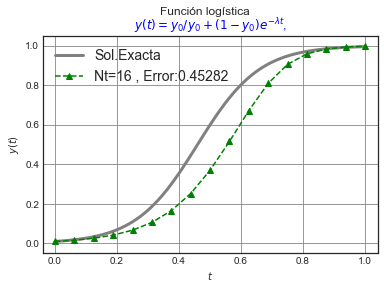

In [62]:
Ecuacion = '$y(t) = y_0 / y_0 + (1 - y_0) e^{-\lambda t}$,'

plt.style.use('seaborn-white')
plt.suptitle('Función logística')
plt.title('Decaimiento Radioactivo', fontsize =14)
plt.plot(tl, y_exacta, 'gray',lw =3,label ='Sol.Exacta')
plt.plot(t, yf, marker='^', linestyle='--', color='g', label ='Nt=16 , Error:0.45282')
plt.title(Ecuacion, fontsize =12, color ='blue')
plt.xlim(-0.04,1.04)
plt.ylim(-0.05 ,1.05)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend(loc='upper left', ncol =1, framealpha =0.75 , fancybox =True , fontsize =14)
plt.grid(color ='gray')
nticks = np.arange(1, Nt +1 ,1)
plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
plt.show()